In [1]:
import os
import h5py
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

from pycbc import conversions
from pycbc import detector
import time
from pycbc.inference import io, models
from pycbc.workflow import WorkflowConfigParser

In [3]:
from pyRing import pyRing

/work/yifan.wang/virtualenv/ringdown/lib/python3.7/site-packages/pyRing/utils.py:16: UserWarning: surfinBH is not automatically installed due to possible conflicts. If you wish to use its functionalities, it needs to be installed separately.
  warnings.warn("surfinBH is not automatically installed due to possible conflicts. If you wish to use its functionalities, it needs to be installed separately.")


In [4]:
input_par = {'data-H1': '', 
             'data-L1': '', 
             'data-V1': '', 
             'ignore-data-filename': 0, 
             'download-data': 1, 
             'datalen-download': 4096.0, 
             'gw-data-find': 0, 
             'gw-data-type-H1': '', 
             'gw-data-type-L1': '', 
             'gw-data-type-V1': '', 
             'tag': 'CLN', 
             'channel-H1': 'GWOSC', 
             'channel-L1': 'GWOSC', 
             'channel-V1': 'GWOSC', 
             'config-file': 'config_gw150914_production.ini', 
             'run-type': 'full', 
             'output': 'GW150914_PROD1_Kerr_221_0M', 
             'run-tag': 'PROD1', 
             'screen-output': 0, 
             'pesummary': 1, 
             'trigtime': 1126259462.423235, 
             'detectors': ['H1', 'L1'], 
             'ref-det': 'H1', 
             'sky-frame': 'equatorial', 
             'acf-H1': '', 
             'acf-L1': '', 
             'acf-V1': '', 
             'psd-H1': '', 
             'psd-L1': '', 
             'psd-V1': '', 
             'signal-chunksize': 8.0, 
             'noise-chunksize': 8.0, 
             'window-onsource': 0, 
             'window': 1, 
             'alpha-window': 0.1, 
             'sampling-rate': 4096.0, 
             'f-min-bp': 20.0, 
             'f-max-bp': 2038.0, 
             'bandpassing': 1, 
             'fft-acf': 1, 
             'acf-simple-norm': 1, 
             'no-lognorm': 0, 
             'truncate': 1, 
             'analysis-duration': 0.2, 
             'analysis-duration-n': int(0.2*4096),
             'zero-noise': 0, 
             'gaussian-noise': '', 
             'gaussian-noise-seed': -1, 
             'gaussian-noise-white-sigma': 1e-21, 
             'chisquare-computation': 0, 
             'non-stationarity-check': 0, 
             'onsource-ACF': 0, 
             'noise-averaging-method': 'mean', 
             'Dirac-comb': 0, 
             'Zeroing-data': 0, 
             'maxent-psd': '', 
             'PSD-investigation': 0, 
             'injection-parameters': None, 
             'injection-approximant': '', 
             'inject-n-ds-modes': {'t': 1}, 
             'inject-area-quantization': 0, 
             'inject-charge': 0, 
             'injection-scaling': 1.0, 
             'injection-T': 64.0, 
             'template': 'Kerr', 
             'single-mode': None, 
             'n-ds-modes': {'t': 1}, 
             'ds-ordering': 'freq', 
             'kerr-modes': [(2, 2, 2, 0), (2, 2, 2, 1)], 
             'reference-amplitude': 1e-21, 
             'spheroidal': 0, 
             'qnm-fit': 1, 
             'coherent-n': 0, 
             'amp-non-prec-sym': 1, 
             'max-Kerr-amp-ratio': 0.0, 
             'TGR-overtones-ordering': 'Unordered', 
             'domega-tgr-modes': None, 
             'dtau-tgr-modes': None, 
             'area-quantization': 0, 
             'tau-AQ': 0, 
             'prior-reweight': 0, 
             'ParSpec': 0, 
             'ParSpec_Dmax_TGR': 2, 
             'ParSpec_Dmax_charge': 0, 
             'EsGB': 0, 
             'charge': 0, 
             'gr-time-prior': 1, 
             'dist-flat-prior': 0, 
             'ds-amp-flat-prior': 0, 
             'mf-time-prior': 67.92493161247017, 
             'nonref-det': 'L1'}

In [5]:
model = pyRing.KerrModel(modes=input_par['kerr-modes'],**input_par)


Trigtime in H1: 1126259462.423235


Reading data...

Using GWPY to download data.
Fetched 1 URLs from www.gw-openscience.org for [1126257414 .. 1126261510))
Reading data... [Done]

Loaded channel GWOSC starting at 1126257414.0 length 4096.0s.
Bandpassing the raw strain between [20.0, 2038.0] Hz.
Downsampling detector data from 16384.0 to 4096.0 Hz, decimate factor 4
Computing the one-sided PSD with the Welch method and the standard ACF for comparison.
No ACF was passed. Estimating ACF.
Plancherel theorem E(f)/E(t) (expected value: 1) = 1.065456229532745

Reading data...

Using GWPY to download data.
Fetched 1 URLs from www.gw-openscience.org for [1126257414 .. 1126261510))
Reading data... [Done]

Loaded channel GWOSC starting at 1126257414.0 length 4096.0s.
Bandpassing the raw strain between [20.0, 2038.0] Hz.
Downsampling detector data from 16384.0 to 4096.0 Hz, decimate factor 4
Computing the one-sided PSD with the Welch method and the standard ACF for comparison.
No ACF was passed.

# Load the PyRing run posteriors

In [6]:
evidence = pd.read_csv('/work/yifan.wang/ringdown/GW150914/pyring/reproduce/t6/221/GW150914_PROD1_Kerr_221_0M/Nested_sampler/Evidence.txt',sep='\t')

In [7]:
evidence

lnZ_noise    lnZ_signal        lnB    Estimated_SNR 
0  38724.013136  38760.758875  36.745739        10.488374

In [8]:
d221 = pd.read_csv('/work/yifan.wang/ringdown/GW150914/pyring//reproduce/t6/221/GW150914_PROD1_Kerr_221_0M/Nested_sampler/posterior.dat',sep=' ')
d221.columns = [d221.columns[(i+1)%len(d221.columns)] for i in range(len(d221.columns))]
d221.drop(columns='#',inplace=True)

In [9]:
d221

Mf        af     A2220     A2221   phi2220   phi2221  \
0       72.444419  0.685669  5.485424  0.261236  5.577737  0.139087   
1       60.647343  0.224913  4.417553  2.726996  6.172681  4.279614   
2      109.942012  0.960884  0.814147  4.859725  4.613551  0.036135   
3       67.756361  0.608115  8.708519  7.552168  5.647384  2.226254   
4      112.875408  0.947589  0.221065  4.562956  0.952363  0.129043   
...           ...       ...       ...       ...       ...       ...   
10781   76.488394  0.784670  5.762782  7.074695  5.185695  1.498296   
10782   74.876464  0.766137  5.855266  6.963844  5.223199  1.538106   
10783   71.128600  0.690774  6.751077  8.834128  5.303243  1.699820   
10784   73.512088  0.734402  6.287531  7.713808  5.297240  1.680110   
10785   74.964282  0.769391  5.889901  7.152684  5.197893  1.537970   

               logL  logPrior  
0      38762.350241       0.0  
1      38765.117169       0.0  
2      38765.247884       0.0  
3      38765.968626       0.0  
4      38766.021826       0.0  
...             ...       ...  
10781  38778.965480       0.0  
10782  38778.985092       0.0  
10783  38778.992359       0.0  
10784  38779.004591       0.0  
10785  38779.016128       0.0  

[10786 rows x 8 columns]

In [10]:
sourcepar={}
for n in model.names:
    sourcepar[n] = d221[n].values[-1]

In [11]:
sourcepar

{'Mf': 74.9642816665504,
 'af': 0.7693909269973396,
 'A2220': 5.889900875719936,
 'A2221': 7.1526843406925416,
 'phi2220': 5.197892748005424,
 'phi2221': 1.5379702539900164}

In [37]:
model.log_likelihood(sourcepar)

77834.21567213075

In [38]:
snr = np.sqrt( 2* (model.log_likelihood(sourcepar)  - model.logZnoise))
print(snr)

10.926092292283421


# Try to get waveform and likelihood

In [39]:
model.fixed_params

{'ra': 1.95, 'dec': -1.27, 'psi': 0.82, 't': 0.0, 'cosiota': -1.0, 'phi': 0.0}

In [40]:
waveform = model.get_waveform(sourcepar)

In [41]:
srate   = 4096.0
T       = 0.1
times   = np.linspace(-0.01, T/2., int(srate*T))

In [42]:
times

array([-0.01      , -0.00985294, -0.00970588, ...,  0.04970588,
        0.04985294,  0.05      ])

In [43]:
# Unpack the waveform and ignore vector and scalar modes.
_, _, _, hp_Kerr, hc_Kerr = waveform.waveform(times)

In [44]:
hp_Kerr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.04864518e-25, 9.94339427e-26, 8.93241753e-26])

In [45]:
%matplotlib inline

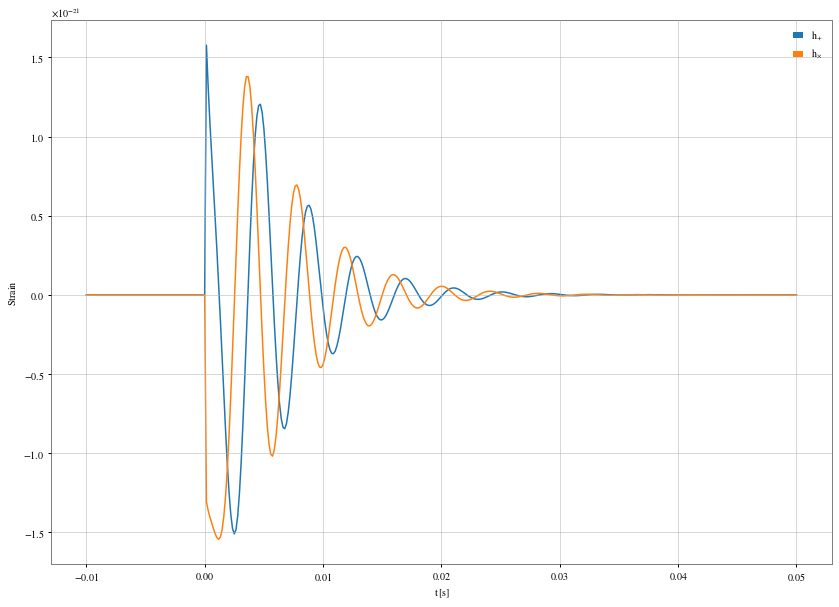

In [46]:
plt.figure(figsize=(14,10))
plt.plot(times, hp_Kerr, label=r'$\mathrm{h}_{+}$')
plt.plot(times, hc_Kerr, label=r'$\mathrm{h}_{\times}$')
plt.xlabel(r'$\mathrm{t \, [s]}$')
plt.ylabel(r'$\mathrm{Strain}$')
plt.legend(loc='best')
plt.show()

In [47]:
waveform.qnms

{(2, 2, 2, 0): <pyRing.waveform.QNM_fit at 0x7f0af93d0ea8>,
 (2, 2, 2, 1): <pyRing.waveform.QNM_fit at 0x7f0a945b2f98>}

In [48]:
waveform.swshs

{(2, 2, 2, 0): (8.867546905635114e-66+0j),
 (2, 2, -2, 0): (0.63078313050504+0j),
 (2, 2, 2, 1): (8.867546905635114e-66+0j),
 (2, 2, -2, 1): (0.63078313050504+0j)}

In [49]:
waveform.TGR_params

{}

In [50]:
waveform.amps

{(2, 2, 2, 0): (2.748545631664532-5.20926379025523j),
 (2, 2, 2, 1): (0.23475237200618132+7.148830995444344j)}

# Reproduce the waveform by myself

In [51]:
from pyRing import waveform as prwaveform

In [52]:
def damped_sinusoid(A,                     # Amplitude
                    f,                     # Frequency
                    tau,                   # Damping time
                    phi,                   # Phase
                    t0,                    # Start time
                    t  # Time array
                   ):
    n=t.shape[0]
    h=np.zeros(n,dtype='complex')
    omega  = 2.0*np.pi*f
    om_cplx = omega+1j/tau
    t_start_idx  = int(np.ceil((t0-t[0])/(t[1]-t[0])))
    h[t_start_idx:] = A*np.exp(1j*om_cplx*(t[t_start_idx:]-t0)+1j*phi)
    return h

def yifan_prwaveform(time,Mf,af,a,l=2,m=2,n=0):
    """
        | We employ the conventions of arXiv:gr-qc/0512160 (Eq. 2.9):
        |                            h_s           = Re(sum_{lmn} S_{lmn} h_{lmn})
        |                            h_vx + i h_vy = sum_{lmn} S_{lmn} h_{lmn}
        |                            h_+  + i h_x  = sum_{lmn} S_{lmn} h_{lmn}
        | Non-precessing symmetry implies the property: h_{l,-m} = (-1)**l h^*_{l,m}
        | (see: Blanchet, “Gravitational Radiation from Post-Newtonian Sources and Inspiralling Compact Binaries”).
    """
    qnm = prwaveform.QNM_fit(l,m,n)
    freq=qnm.f(Mf,af)
    tau=qnm.tau(Mf,af)
    
    swsh_p = prwaveform.SWSH(2,l,m)(np.arccos(model.fixed_params['cosiota']),model.fixed_params['phi'])
    swsh_m = prwaveform.SWSH(2,l,-m)(np.arccos(model.fixed_params['cosiota']),model.fixed_params['phi'])
    h_tmp = damped_sinusoid(1e-21,  freq, tau, 0.0, 0, times) * swsh_p * a + \
    damped_sinusoid(1e-21, -freq, tau, 0.0, 0, times) * swsh_m * np.conj(a)*(-1)**l
    print(swsh_p,swsh_m)
    h_p  = np.real(h_tmp)
    h_c  = np.imag(h_tmp)
       
    return np.array([h_p, h_c])

In [53]:
sourcepar

{'Mf': 74.9642816665504,
 'af': 0.7693909269973396,
 'A2220': 5.889900875719936,
 'A2221': 7.1526843406925416,
 'phi2220': 5.197892748005424,
 'phi2221': 1.5379702539900164}

In [54]:
hp220,hc220 = yifan_prwaveform(times,sourcepar['Mf'],sourcepar['af'],
                               sourcepar['A2220']*np.exp(1j*sourcepar['phi2220']))
hp221,hc221 = yifan_prwaveform(times,sourcepar['Mf'],sourcepar['af'],
                               sourcepar['A2221']*np.exp(1j*sourcepar['phi2221']),l=2,m=2,n=1)

(8.867546905635114e-66+0j) (0.63078313050504+0j)
(8.867546905635114e-66+0j) (0.63078313050504+0j)


In [55]:
waveform.swshs

{(2, 2, 2, 0): (8.867546905635114e-66+0j),
 (2, 2, -2, 0): (0.63078313050504+0j),
 (2, 2, 2, 1): (8.867546905635114e-66+0j),
 (2, 2, -2, 1): (0.63078313050504+0j)}

In [56]:
waveform.reference_amplitude

1e-21

In [57]:
prwaveform.SWSH(2,2,2)(0,0)

(0.63078313050504+0j)

In [58]:
prwaveform.SWSH(2,2,-2)(waveform.iota,waveform.phi)

(0.63078313050504+0j)

In [59]:
sourcepar['A2220']*np.exp(1j*sourcepar['phi2220'])

(2.748545631664532-5.20926379025523j)

In [60]:
sourcepar['A2221']*np.exp(1j*sourcepar['phi2221'])

(0.23475237200618132+7.148830995444344j)

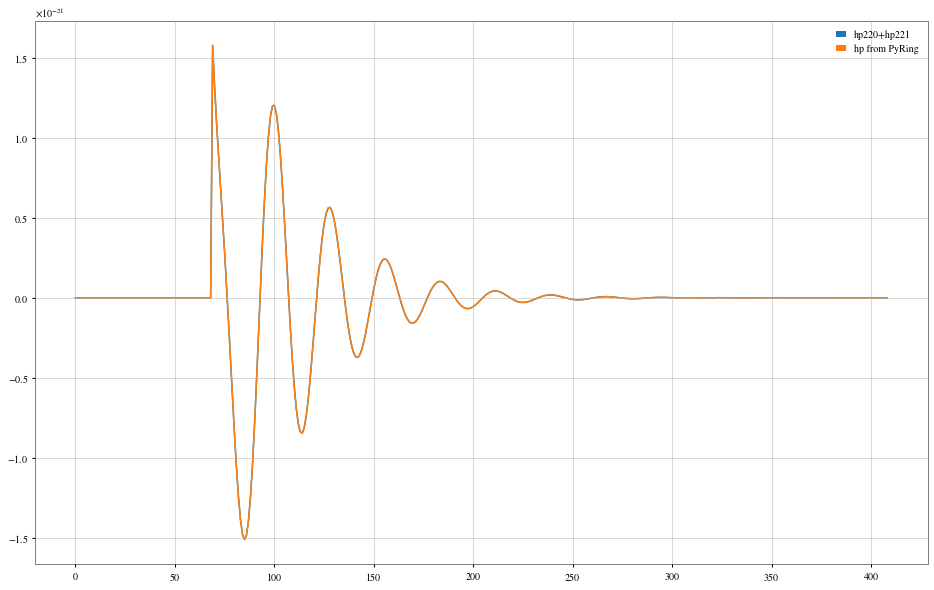

In [61]:
plt.figure(figsize=[16,10])
plt.plot(hp220+hp221,label='hp220+hp221')
plt.plot(hp_Kerr,label='hp from PyRing')
plt.legend(loc='best')

In [62]:
prwaveform.SWSH(2,2,2)(0,0)

(0.63078313050504+0j)

In [63]:
1/8 * np.sqrt(5/np.pi)

0.15769578262626002

In [64]:
prwaveform.SWSH(2,2,2)(0,0) / (1/8 * np.sqrt(5/np.pi))

(3.999999999999999+0j)

In [65]:
import lal

In [66]:
lal.SpinWeightedSphericalHarmonic(0, 0, -2,2,2)

(0.6307831305050401+0j)

In [67]:
np.sqrt(5/(4*np.pi))

0.6307831305050401

# Likelihood

In [39]:
sourcepar

{'Mf': 74.9642816665504,
 'af': 0.7693909269973396,
 'A2220': 5.889900875719936,
 'A2221': 7.1526843406925416,
 'phi2220': 5.197892748005424,
 'phi2221': 1.5379702539900164}

In [40]:
model.log_likelihood(sourcepar)

77834.21567213075

In [41]:
wf_model        = model.get_waveform(sourcepar)

In [42]:
model.fixed_params

{'ra': 1.95, 'dec': -1.27, 'psi': 0.82, 't': 0.0, 'cosiota': -1.0, 'phi': 0.0}

In [43]:
model.time_delay

{'H1_H1': 0.0, 'H1_L1': -0.006984417440169671}

In [44]:
model.ref_det

'H1'

In [45]:
model.truncate,  model.duration_n,  model.OnsourceACF,  model.Dirac_comb, model.Zeroing_data

(1, 819, 0, 0, 0)

In [46]:
ra = model.fixed_params['ra']
dec = model.fixed_params['dec']
psi = model.fixed_params['psi']
t_start = model.fixed_params['t']

In [47]:
from pyRing import likelihood

In [48]:
likelihood.loglikelihood(model,sourcepar,wf_model,
                        ra,dec,psi,t_start,
                        model.time_delay,
                        model.ref_det,
                        1,
                        409,
                        0,
                        0,
                        0)

ValueError: shapes (819,819) and (409,) not aligned: 819 (dim 1) != 409 (dim 0)

Exception ignored in: 'pyRing.likelihood.inner_product'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 6, in dot
ValueError: shapes (819,819) and (409,) not aligned: 819 (dim 1) != 409 (dim 0)


ValueError: shapes (819,819) and (409,) not aligned: 819 (dim 1) != 409 (dim 0)

Exception ignored in: 'pyRing.likelihood.inner_product'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 6, in dot
ValueError: shapes (819,819) and (409,) not aligned: 819 (dim 1) != 409 (dim 0)


78663.80172661743

In [49]:
model.detectors

{'H1': <pyRing.likelihood.detector at 0x7f536a6539a8>,
 'L1': <pyRing.likelihood.detector at 0x7f534619af48>}

In [50]:
model.tevent

1126259462.423235

In [51]:
model.detectors

{'H1': <pyRing.likelihood.detector at 0x7f536a6539a8>,
 'L1': <pyRing.likelihood.detector at 0x7f534619af48>}

In [52]:
model.detectors['H1'].time

array([1.12625946e+09, 1.12625946e+09, 1.12625946e+09, ...,
       1.12625947e+09, 1.12625947e+09, 1.12625947e+09])

In [53]:
model.detectors['H1'].time_series

array([ 9.94803447e-22,  1.95759424e-20, -1.01881499e-20, ...,
        9.55621956e-21, -1.19521072e-20, -1.66901314e-20])

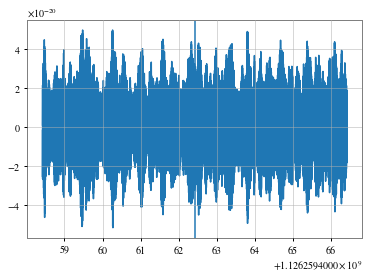

In [54]:
plt.plot(model.detectors['H1'].time,model.detectors['H1'].time_series)
plt.axvline(model.tevent)

# PyCBC waveform

In [55]:
cp = WorkflowConfigParser(['./inference-GW150914_095045.ini'])
model = models.read_from_config(cp)

In [56]:
cp.get('static_params','harmonics')

'spherical'

In [57]:
model.variable_params

('final_mass', 'final_spin', 'amp220', 'phi220', 'absamp221', 'phi221')

In [58]:
model.static_params

{'approximant': 'TdQNMfromFinalMassSpin',
 'harmonics': 'spherical',
 'tref': 1126259462.4085495,
 'ra': 1.95,
 'dec': -1.27,
 'toffset': 0.0,
 'lmns': 222.0,
 'polarization': 0.82,
 'inclination': 3.1415926}

In [59]:
params = {'final_mass':d221['Mf'].values[-1],
         'final_spin':d221['af'].values[-1],
         'amp220':d221['A2220'].values[-1]*1e-21,
         'phi220':d221['phi2220'].values[-1],
         'absamp221':d221['A2221'].values[-1]*1e-21,
         'phi221':d221['phi2221'].values[-1]}

In [60]:
model.update(**params)
model.loglikelihood

-70884062.96457261

In [61]:
# get the matched-filter SNR
print((2*model.loglr)**0.5)

(6.402287262486089e-15+104.55728569157426j)


In [62]:
model.current_params

{'final_mass': 74.9642816665504,
 'final_spin': 0.7693909269973396,
 'amp220': 5.889900875719935e-21,
 'phi220': 5.197892748005424,
 'absamp221': 7.15268434069254e-21,
 'phi221': 1.5379702539900164,
 'approximant': 'TdQNMfromFinalMassSpin',
 'harmonics': 'spherical',
 'tref': 1126259462.4085495,
 'ra': 1.95,
 'dec': -1.27,
 'toffset': 0.0,
 'lmns': 222.0,
 'polarization': 0.82,
 'inclination': 3.1415926,
 't_gate_start': 1126259460.4085495,
 't_gate_end': 1126259462.4085495,
 'tc': 1126259462.4075496,
 'amp221': 1.2143980843851219}

In [63]:
model.static_params

{'approximant': 'TdQNMfromFinalMassSpin',
 'harmonics': 'spherical',
 'tref': 1126259462.4085495,
 'ra': 1.95,
 'dec': -1.27,
 'toffset': 0.0,
 'lmns': 222.0,
 'polarization': 0.82,
 'inclination': 3.1415926}

In [64]:
wf = model.waveform_generator.generate(**model.current_params)

In [65]:
wf

{'H1': <pycbc.types.frequencyseries.FrequencySeries at 0x7f534d58efd0>,
 'L1': <pycbc.types.frequencyseries.FrequencySeries at 0x7f534d58eef0>}

In [66]:
wfh1time = wf['H1'].to_timeseries()

In [67]:
wfh1time

(1126259462.4075496, 1126259462.5075495)

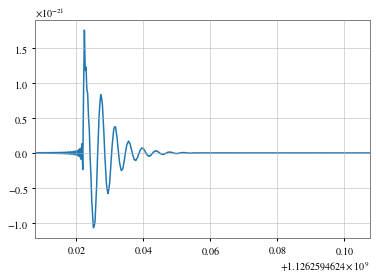

In [68]:
plt.plot(wfh1time.sample_times,wfh1time)
plt.xlim(model.current_params['tc'],model.current_params['tc']+0.1)

# Waveform

In [69]:
from pycbc.waveform import ringdown

In [70]:
hp,hc = ringdown.get_td_from_final_mass_spin(**model.current_params)

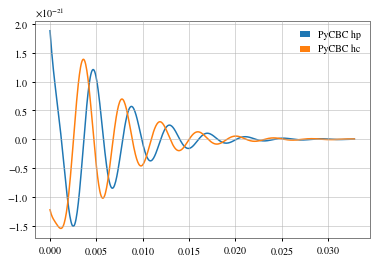

In [71]:
plt.plot(hp.sample_times,hp,label='PyCBC hp')
plt.plot(hc.sample_times,hc,label='PyCBC hc')
plt.legend(loc='best')

In [72]:
# Unpack the waveform and ignore vector and scalar modes.
_, _, _, hp_Kerr, hc_Kerr = waveform.waveform(hp.sample_times.data)

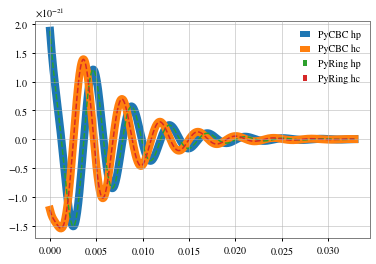

In [73]:
plt.plot(hp.sample_times,hp,lw=8,label='PyCBC hp')
plt.plot(hc.sample_times,hc,lw=8,label='PyCBC hc')
plt.plot(hc.sample_times,hp_Kerr,ls='--',label='PyRing hp')
plt.plot(hc.sample_times,hc_Kerr,ls='--',label='PyRing hc')
plt.legend(loc='best')